In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_palette(sns.color_palette("bright"))
sns.set_style("dark")

sns.set_context("talk")

In [2]:
# df_data = pd.read_csv("data/2019_nCoV_data.csv")
df_data = pd.read_csv("../data/covid_19_data.csv")
df_data = df_data.rename(columns={"Country/Region": "Country", "ObservationDate":"Date"})
df_data["Date"] = pd.to_datetime(df_data["Date"])

In [3]:
df_data[df_data["Country"] == "Mainland China"]

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5980,5981,2020-03-16,Xinjiang,Mainland China,2020-03-11T02:18:14,76.0,3.0,73.0
5981,5982,2020-03-16,Inner Mongolia,Mainland China,2020-03-16T14:38:45,75.0,1.0,73.0
5982,5983,2020-03-16,Ningxia,Mainland China,2020-03-16T14:38:45,75.0,0.0,75.0
6042,6043,2020-03-16,Qinghai,Mainland China,2020-03-11T02:18:14,18.0,0.0,18.0


In [4]:
importantes = ["Colombia", "Italy", "Spain", "France", "Japan", "Germany", "South Korea"]

In [5]:
df_prin = df_data[df_data["Country"].isin(importantes)]
df_prin = df_prin[df_prin["Confirmed"] > 0]
df_prin['start_date'] = df_prin.groupby('Country')['Date'].transform('min')
df_prin["days_since_start"] = (df_prin["Date"] - df_prin['start_date']).dt.days

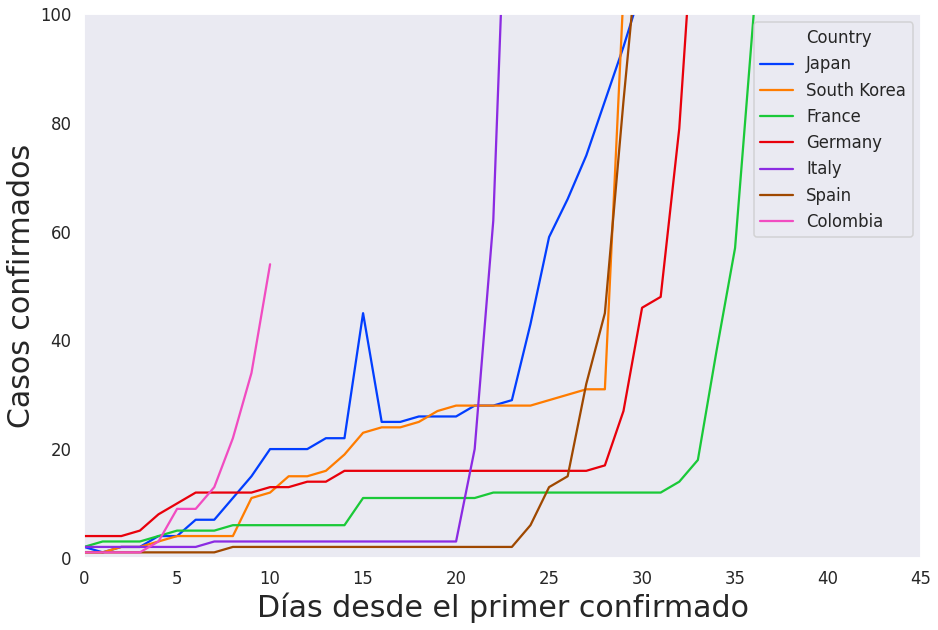

In [21]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="days_since_start", y="Confirmed", hue="Country", data=df_prin)
ax.set_xlabel("Días desde el primer confirmado",fontsize=30)
ax.set_ylabel("Casos confirmados",fontsize=30)
axes = ax.axes
axes.set_ylim(0,100)
axes.set_xlim(0,45)
plt.show()

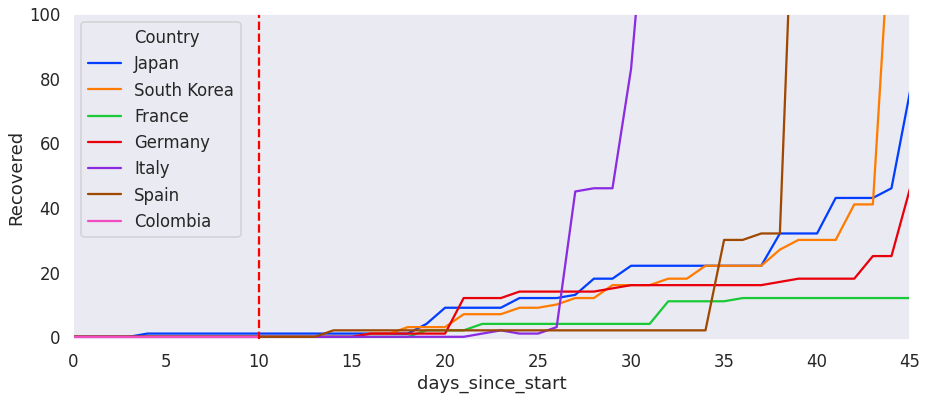

In [15]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x="days_since_start", y="Recovered", hue="Country", data=df_prin)
plt.axvline(10, 0,1400, color="r", linestyle='--')
axes = ax.axes
axes.set_ylim(-1,100)
axes.set_xlim(0,45)
plt.show()

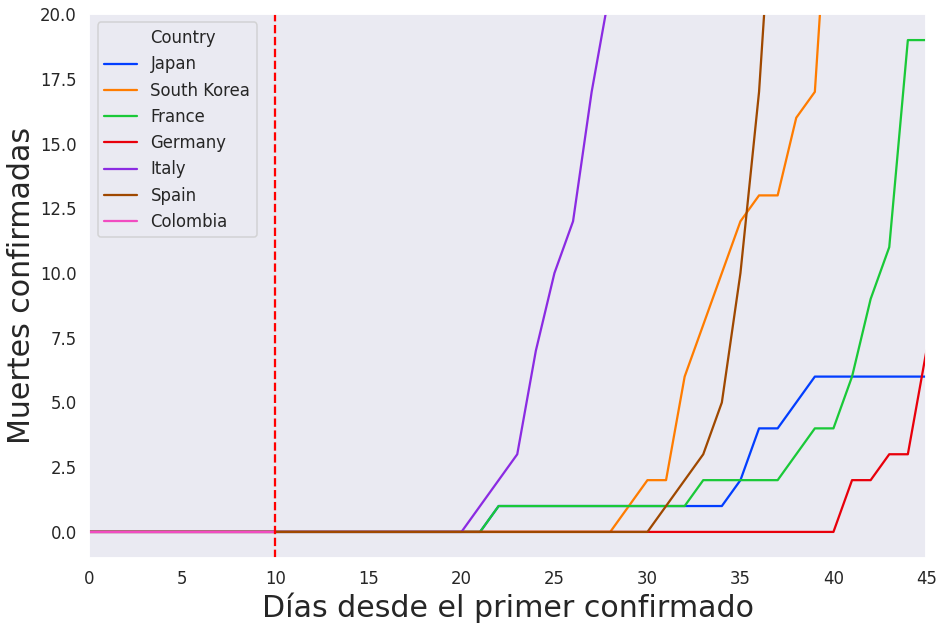

In [23]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="days_since_start", y="Deaths", hue="Country", data=df_prin)
plt.axvline(10, 0,1400, color="r", linestyle='--')
ax.set_xlabel("Días desde el primer confirmado",fontsize=30)
ax.set_ylabel("Muertes confirmadas",fontsize=30)
axes = ax.axes
axes.set_ylim(-1,20)
axes.set_xlim(0,45)
plt.show()

In [9]:
df_korea = df_data[df_data["Country"] == "South Korea"]

In [10]:
7755-8162

-407

In [11]:
df_korea.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
4938,4939,2020-03-12,NaN,South Korea,2020-03-12T05:13:02,7869.0,66.0,333.0
5266,5267,2020-03-13,NaN,South Korea,2020-03-11T20:00:00,7979.0,66.0,510.0
5386,5387,2020-03-14,NaN,South Korea,2020-03-14T01:33:02,8086.0,72.0,510.0
5635,5636,2020-03-15,NaN,South Korea,2020-03-15T18:20:18,8162.0,75.0,510.0
5894,5895,2020-03-16,NaN,South Korea,2020-03-16T14:38:45,8236.0,75.0,1137.0


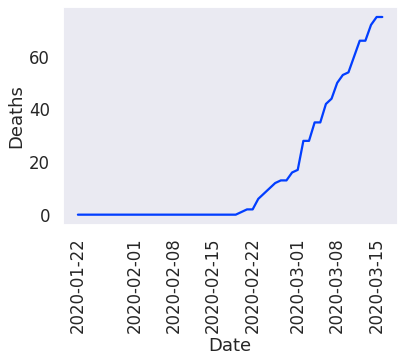

In [12]:
chart = sns.lineplot(x="Date", y="Deaths", data=df_korea)
plt.xticks(rotation=90)
plt.show()

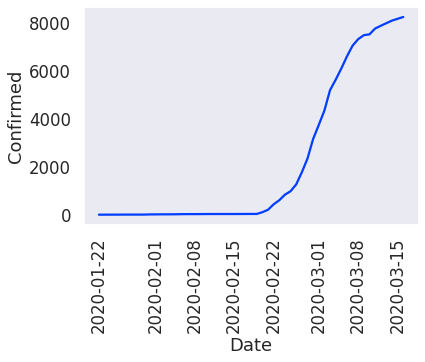

In [13]:
chart = sns.lineplot(x="Date", y="Confirmed", data=df_korea)
plt.xticks(rotation=90)
plt.show()